#Data Exploration
##Dataset Information

##Importing modules

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers, models

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
df = pd.read_csv(r"\\wsl.localhost\Ubuntu\home\madeeha\repositories\MLR503-CC-Fraud-Detection\creditcard_2023.csv")

In [4]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


###The only known variables to us are the id, Amount and Class variables/features. All the other features have been anonymized by the dataset provider for security reasons.

In [5]:
df.shape

(568630, 31)

In [6]:
print("Class 0: ",((df['Class'] == 1).sum()/len(df))*100, "%")
print("Class 1: ",((df['Class'] == 0).sum()/len(df))*100, "%")

Class 0:  50.0 %
Class 1:  50.0 %


####We can see that the classes 0 and 1 are equal in the dataset implying no imbalance in the dataset, due to which the SMOTE Technique will not used with this dataset.

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#dropping the id attribute because it is not contributing to the model
df = df.drop('id', axis=1)

In [17]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


#Visualizing the data - building a scatter plot

Text(0, 0.5, 'Frequency')

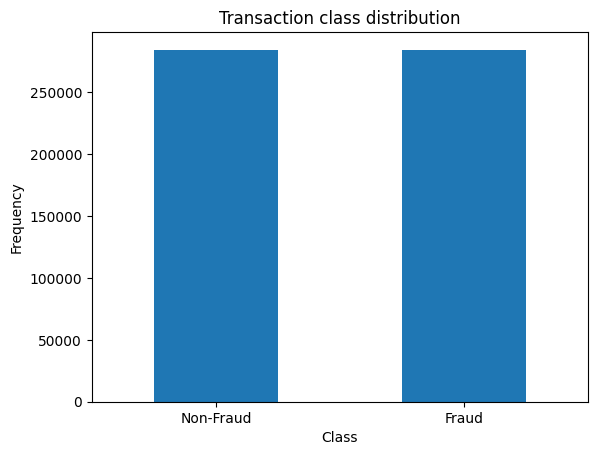

In [18]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
LABELS = ['Non-Fraud', 'Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
numerical_attributes = df.columns

# Create a scatter plot matrix
sns.pairplot(df[['V1','V2','V3']])
plt.show()

KeyboardInterrupt: 

#Splitting the dataset into training and test sets

In [10]:
X = df.drop('Class', axis=1)  # Input Features
y = df['Class']               # Target 

In [11]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardizing the data

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #returns a numpy array
X_test_scaled = scaler.transform(X_test)


In [13]:
#visualizing the scaled training data 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.shape


(454904, 29)

In [14]:
X_train_scaled_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,...,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05,4.549040e+05
mean,-1.964948e-17,-1.686919e-17,-1.073068e-17,-1.065258e-17,1.655680e-17,1.593201e-18,-1.266751e-17,3.795568e-18,-6.310326e-18,9.371772e-19,...,4.311015e-18,2.514759e-18,-1.355783e-17,-1.499483e-18,-1.219892e-17,-8.661079e-18,-1.521351e-17,-6.154130e-18,5.060757e-18,2.379337e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.495960e+00,-4.995538e+01,-3.184530e+00,-4.951663e+00,-9.949347e+00,-2.111760e+01,-4.316361e+00,-1.076043e+01,-3.753506e+00,-3.167138e+00,...,-7.811402e+01,-1.939819e+01,-7.737309e+00,-3.035285e+01,-4.070351e+00,-1.361614e+01,-8.228577e+00,-1.046747e+01,-3.913670e+01,-1.732556e+00
25%,-5.661092e-01,-4.865458e-01,-6.492462e-01,-6.569042e-01,-2.933163e-01,-4.462394e-01,-2.818187e-01,-1.923542e-01,-5.690208e-01,-5.901737e-01,...,-3.495806e-01,-1.664761e-01,-4.906566e-01,-2.385082e-01,-6.518654e-01,-5.537833e-01,-6.319123e-01,-3.036185e-01,-2.335213e-01,-8.656601e-01
50%,-9.310729e-02,-1.357420e-01,3.378567e-04,-7.427465e-02,8.094199e-02,7.874924e-02,2.315255e-01,-1.146872e-01,9.345382e-02,2.631067e-01,...,-1.232684e-01,-3.742739e-02,-2.785267e-02,-6.013433e-02,1.641291e-02,-8.469578e-03,-1.208044e-02,-1.720672e-01,-1.486760e-02,-6.047579e-04
75%,8.324325e-01,3.436814e-01,6.284381e-01,7.081200e-01,4.400565e-01,4.981609e-01,5.215297e-01,4.658485e-02,5.599726e-01,5.932659e-01,...,2.489111e-01,1.482638e-01,4.635576e-01,1.554231e-01,7.016778e-01,5.499770e-01,6.733634e-01,3.332611e-01,4.108044e-01,8.657982e-01
max,2.225260e+00,4.360973e+00,1.412887e+01,3.201798e+00,4.270267e+01,2.617685e+01,2.160606e+02,5.960381e+00,2.027853e+01,3.176175e+01,...,2.986088e+01,8.093887e+00,1.263568e+01,3.176681e+01,1.297101e+01,1.156164e+01,5.624632e+00,1.129014e+02,7.745336e+01,1.733540e+00


#Based on the Architecture, our proposed model adds the Reconstruction Errors from the  Autoencoders and labels from the K-means clustering techniques back to the original dataset.

#Unsupervised Learning using Autoencoders
###Train the Autoencders on the normal data, unlike this dataset, usually the dataset in this domain is highly likely to be unbalanced with normal data exceeding significantly the fruadulent data, which is why compressing the normal data would be a better approach. Also, considering the fact that fraud is a rare occurence so the reconstruction error would be high for abnormal data.

In [16]:
X_train_Autoencoder = X_train_scaled_df[y_train == 0]
#models.Sequential is a model from Keras where each layer feeds as input to the next layer.

autoencoder = models.Sequential([
    layers.Input(shape=(X_train_Autoencoder.shape[1],)),
    layers.Dense(32, activation='relu'), #(ReLu - Rectified Linear Unit) #encoding/compression
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),  # Bottleneck layer (smallest representation)
    layers.Dense(16, activation='relu'), #Process of decoding starts
    layers.Dense(32, activation='relu'),
    layers.Dense(X_train_Autoencoder.shape[1], activation='sigmoid')  # Output layer
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with normal data
history = autoencoder.fit(X_train_Autoencoder, X_train_Autoencoder,
                          epochs=50,  
                          batch_size=256,
                          validation_split=0.1,
                          shuffle=True)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
225908,-0.449359,0.022698,0.037920,-1.324642,0.588570,0.372863,0.636246,-0.091875,1.419651,1.681697,...,0.045749,-0.359143,-0.772060,0.289799,-2.352699,-0.089708,0.505295,0.388024,0.067074,-0.971002
154030,1.668580,-0.638618,0.544217,-0.456429,-0.034659,0.540762,0.104395,-0.113459,2.512944,0.513062,...,-0.403953,-0.137031,0.039450,0.272799,-0.759713,-1.098733,0.969578,-0.287734,-0.243258,0.892512
276397,-0.053868,-0.141452,0.251407,-1.177533,0.618193,0.978237,0.510163,0.066254,0.485411,0.497284,...,-0.350320,-0.174592,-0.397942,0.131723,-2.609150,-1.064688,0.593182,0.083987,0.047752,0.449124
203835,1.586753,-0.874189,-0.020836,-1.022085,0.080529,0.466920,0.176940,-0.138521,0.349567,0.670265,...,0.225556,0.036702,0.679887,-0.066060,0.447731,-0.348304,-0.287551,-0.238092,-0.086242,-1.471545
56158,0.078515,-0.116084,1.030121,-0.685543,0.398803,0.162926,0.673958,-0.146484,0.373601,0.410619,...,-0.070744,-0.236940,-0.836121,-0.129358,-0.919778,-0.208463,0.299780,0.047732,0.111583,-0.090250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146015,1.016633,-0.926564,-0.406434,-0.540176,1.001702,0.940359,0.926973,-0.174144,0.371867,0.562616,...,0.367777,0.139733,1.063403,-0.574247,-1.398772,0.825188,0.370640,-0.363697,-0.185008,-0.903859
17947,1.021130,-0.535265,0.125062,-0.937516,1.167982,2.173166,0.222848,0.048594,0.561403,0.583770,...,-0.054952,-0.160576,-0.600198,-0.020472,2.274779,0.552809,0.764947,-0.273083,-0.056866,-0.658511
223797,1.664678,-0.626480,0.518803,-0.426391,-0.074474,0.347119,0.156157,-0.116542,1.698705,0.528698,...,-0.408506,-0.064875,0.334311,0.350032,2.359576,-0.803443,-1.132526,-0.176588,-0.141618,1.489376
194456,1.403199,-0.796268,0.190496,-0.434894,0.032443,0.385155,0.300868,-0.149327,1.463207,0.527856,...,-0.038758,0.017190,0.521931,-0.001650,1.297495,-0.419671,-0.670782,-0.243213,-0.106238,-1.714655


In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

###REconstruction Errors

In [ ]:
X_train_reconstructions = autoencoder.predict(X_train_scaled_df)
mse_train = np.mean(np.power(X_train_scaled_df - X_train_reconstructions, 2), axis=1)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_reconstructions = autoencoder.predict(X_test_scaled_df)
mse_test = np.mean(np.power(X_test_scaled_df - X_test_reconstructions, 2), axis=1) 

In [ ]:
print(mse_train[:5], y_train[:5])
print(mse_test[:5], y_test[:5])

**##How do I Identify Misclassifications? how to set a threshold value?**

#Unsupervised Learning using K-means


#Supervised Learning using a Deep learning model ()